In [1]:
import ImageRepresentation
import ThesisToolkit
from ThesisToolkit import FeaturesIOToolkit as featuresIO
import numpy as np
import os
saved_model = "/mnt/datasets/codebook/delf_256_model.pkl"
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
ir = ImageRepresentation.ImageRepresentation(name = 'delf_vlad', saved_model = saved_model)
print(ir.codebook.cluster_centers_.shape)

(256, 40)


In [3]:
imgs = ["/mnt/datasets/daejeon520_query_delf/_S5Wb3r8JBX4OEoHdmT97-w_2.delf",
        "/mnt/datasets/daejeon_sv_v1_delf/600_gsv_3.delf",
        "/mnt/datasets/daejeon_sv_v1_delf/256_gsv_1.delf"]

In [4]:
features = []
for img in imgs:
    _,im_locs, im_des = featuresIO().DelfReadSingleImage(features_path = img)
#     vector = ir.MP_VLADEncode(image_features=im_des, image_locs=im_locs, pca=False, grid=1)
    vector = ir.GeMPooling(image_features=im_des)
    features.append(vector)
    print(vector)

W1129 16:02:39.331853 140578623608576 deprecation.py:323] From /home/canhld/workplace/models/research/delf/delf/python/feature_io.py:171: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.


[ 9.36601142e-02 -4.84117722e-01 -2.76616945e-01 -3.67854981e-03
 -4.99825586e-03 -1.00916776e-01 -3.65343767e-01 -5.01399903e-01
  3.57284530e-02  2.89395271e-01 -3.76736578e-02 -1.36454584e-01
 -1.77741909e-02  2.21286778e-01  1.52461868e-02  1.21318544e-02
  5.83461104e-02 -1.27095143e-02 -3.56684152e-03 -8.11120802e-04
 -6.11315279e-03  2.20120242e-01  1.20145917e-03 -6.53425984e-02
 -1.57699347e-01  3.23000907e-04 -2.12939133e-02  1.61494369e-02
 -1.51673514e-01  5.38586417e-02 -4.43188206e-03  2.51484477e-04
 -1.52700068e-05  9.75665555e-02 -3.51611439e-02 -1.27442830e-02
  1.00588387e-01  3.68044864e-03 -3.99709839e-02  3.87768392e-03]
[ 1.74112725e-02 -2.43051529e-02 -7.58853131e-02 -1.12981291e-03
  2.66823174e-02 -5.16248904e-01 -8.82959791e-06 -9.62124352e-02
 -1.40572245e-02  1.16980978e-01 -3.49444368e-01 -5.53555292e-01
  4.35548488e-04 -7.28350935e-04  2.36755847e-01  5.45943210e-02
 -1.24310285e-01 -2.03950867e-03 -4.12993829e-02  1.30037768e-01
  2.22922450e-01 -2.0286

0.22932219762283362 0.3378484521720837


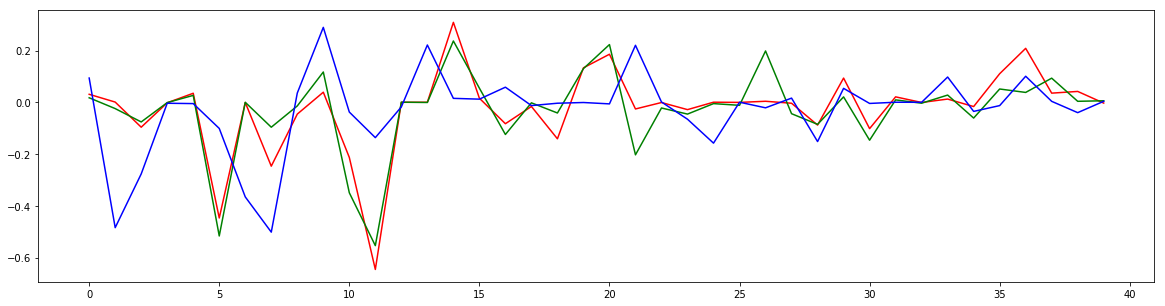

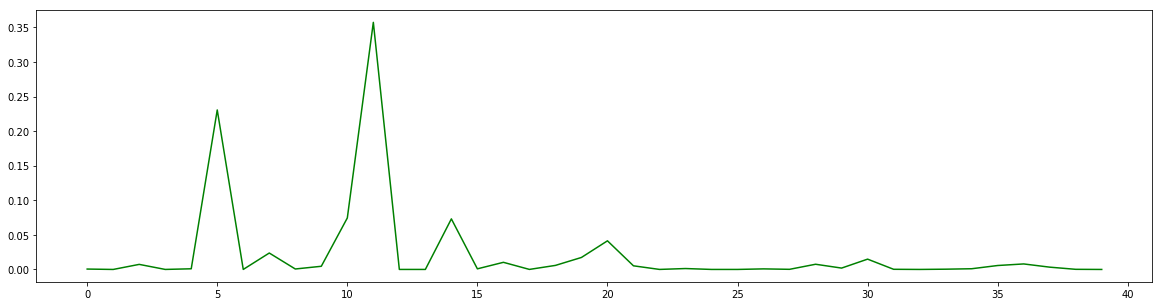

(array([0.00161303, 0.01302733, 0.02702822, 0.0024376 , 0.02076398,
        0.01292307, 0.022059  , 0.03499861, 0.00571593, 0.03756235,
        0.04085953, 0.0098629 , 0.01660834, 0.01171102, 0.0140956 ,
        0.01663937, 0.01499896, 0.01062152, 0.00744046, 0.0190106 ,
        0.02855632]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <matplotlib.lines.Line2D at 0x7fda6213b470>)

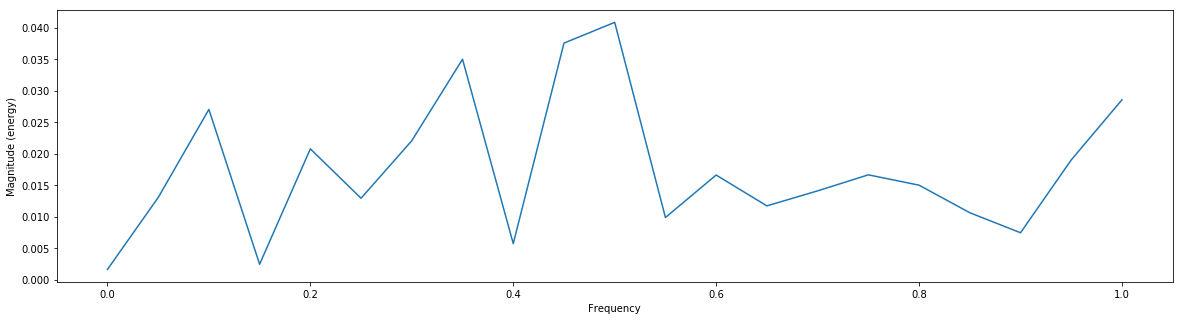

In [5]:
cmp0 = np.dot(features[0], features[1])
cmp1 = np.dot(features[0], features[2])
cmp_vec0 = features[2]*features[1];
cmp_vec1 = features[0]*features[2];
print(cmp0, cmp1)
plt.figure(figsize=(20,5))
# plt.plot(cmp_vec1, color = 'r')
# plt.plot(cmp_vec0, color = 'b')
x_indexes = np.arange(cmp_vec0.shape[0])
# print(x_indexes)
plt.plot(features[2][x_indexes],color = 'r')
plt.plot(features[1][x_indexes], color = 'g')
plt.plot(features[0][x_indexes],color = 'b')
plt.show()
plt.figure(figsize=(20,5))
# plt.plot(cmp_vec1[x_indexes], color = 'r')
plt.plot(cmp_vec0[x_indexes], color = 'g')
plt.show()
plt.figure(figsize=(20,5))
plt.magnitude_spectrum(features[0])

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import image as img
from scipy import spatial
from skimage import feature
from skimage import measure
from skimage import transform

loc0,des0, = featuresIO.DelfReadSingleImage('/mnt/datasets/daejeon_sv_v1_query_delf/IMG_0598.delf')
nums_features_0 = len(des0)
loc1,des1 = featuresIO.DelfReadSingleImage('/mnt/datasets/daejeon_sv_v1_delf/1029_gsv_6.delf')
nums_features_1 = len(des1)
q_tree = spatial.cKDTree(des0)
_, indices = q_tree.query(des1, distance_upper_bound = 0.9)
location_to_use_1 = np.array([
            loc1[i,]
            for i in range(min(nums_features_0, nums_features_1))
            if indices[i] != nums_features_0
        ])
print(location_to_use_1.shape)
location_to_use_0 = np.array([
            loc0[indices[i],]
            for i in range(min(nums_features_0, nums_features_1))
            if indices[i] != nums_features_0
        ])
print(location_to_use_0.shape)
_, inliers = measure.ransac((location_to_use_0, location_to_use_1),
                          transform.AffineTransform,
                          min_samples=3,
                          residual_threshold=20,
                          max_trials=1000)
print(sum(inliers))
im0 = img.imread('/mnt/datasets/daejeon_sv_v1_query_full/IMG_0598.jpg')
im1 = img.imread("/mnt/datasets/daejeon_sv_v1/1029_gsv_6.jpg")
f = plt.figure(figsize=(20,8))
# inliers_idx = np.nonzero(inliers)[0]
inliers_idx = np.arange(0,inliers.shape[0])
feature.plot_matches(plt, im0, im1, location_to_use_0, location_to_use_1, np.column_stack((inliers_idx, inliers_idx)), keypoints_color='b', only_matches=0, matches_color= 'r')

TypeError: Expected binary or unicode string, got None

[[256.         256.        ]
 [271.4932251  180.9954834 ]
 [256.         128.        ]
 ...
 [181.02108765 135.76580811]
 [429.92504883 135.76580811]
 [248.9039917  181.02108765]]


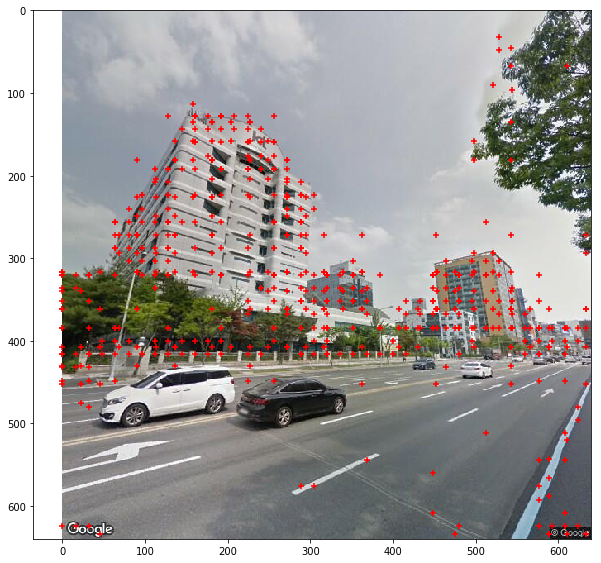

In [24]:
loc,des = featuresIO.DelfReadSingleImage('/mnt/datasets/daejeon_sv_v1_delf/600_gsv_3.delf')
print(loc)
plt.figure(figsize=(10,10))
y = loc[:,0]
x = loc[:,1]
im = img.imread("/mnt/datasets/daejeon_sv_v1/600_gsv_3.jpg")
plt.imshow(im)
plt.scatter(x, y,color='red', marker='+')

In [4]:
import Dataset
query_dir = "/mnt/datasets/kakao_queries/"
database_indexes = "/mnt/datasets/daejeon520.csv"
query_indexes = "/mnt/datasets/kakao_queries.csv"
query_annotation = "/mnt/datasets/kakao_queries_50m.csv"

In [5]:
query_tool = Dataset.Query(name = "test")

In [6]:
query_tool.AnnotatesQueries(query_dir=query_dir, query_indexes=query_indexes, annotation_file=query_annotation, database_indexes=database_indexes, bound = 50)

101
32380


In [ ]:
import os
s = '//home//canhld/workplace/streetget/streetget/Daejeon520_4/_Zzz9sWVRBpHrFZSE9g3Aog/Zzz9sWVRBpHrFZSE9g3Aog_zoom_4.jpg'
# s.split('/')[-1][:-11]
s.split('/')